# 다항 회귀

## 다항회귀란?
- 독립변수와 종속변수들 간의 관계를 다차 다항식으로 표현하는 회귀 방식
- 예를 들어, 2개의 독립변수 X1, X2와 종속변수 Y의 관계를 아래와 같은 다항식으로 표현
> $ Y = w_0 + w_1X_1 + w_2X_2 + w_3X_1X_2 + w_4X_1^2 + w_5X_2^2 $
- 회귀식의 형태가 독립변수의 선형이 아니기 때문에 비선형 회귀라고 오해할 수 있으나, **다항 회귀는 선형 회귀**에 해당!
- 선형 회귀와 비선형 회귀를 구분하는 기준은 **회귀 계수들의 형태가 선형인가 비선형인가의 여부**이다. (독립변수의 형태와는 상관 없다.)
- 보다 엄밀하게, 다항 회귀를 선형화 할 수 있는(linearizable)회귀라고 명명
- 회귀식의 독립변수들을 각각 새로운 변수로 치환해서 1차 방정식으로 표현
> $ Y = w_0 + w_1Z_1 + w_2Z_2 + w_3Z_3 + w_4Z_4 + w_5Z_5 $
- 따라서 다항 회귀는 다중 선형 회귀와 동일한 절차를 통해서 분석을 수행
- 단, 비선형 함수를 선형적으로 적용시키는 과정이 선행되어야 함

## 사이킷런에서 다항식 특성으로의 변환 수행

### preprocessing 모듈에 있는 PolynomialFeatures를 이용하여 특성들을 다항식 형태로 변환하는 객체를 생성

In [2]:
import numpy as np
import sklearn.preprocessing as pp

# 원본 특성 데이터는 아래와 같이 [[0, 1] [2, 3]] 배열
X = np.arange(4).reshape(2,2)

# 매개변수 degree는 변환하려는 다항식의 차수이며, 기본값은 2
poly = pp.PolynomialFeatures(degree=2)

### 객체에 대해서 fit_transform 메소드를 이용하여 변환

In [3]:
# 매개변수는 원본 특성 집합
# 반환 결과는 다항식 형태로 변환된 특성 집합
X_poly = poly.fit_transform(X)
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [5]:
#  fit 및 transform을 각각 순서대로 호출해도 무방
poly.fit(X)
X_poly = poly.transform(X)
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 2차 다항식으로 변환된 결과는 원본 특성에 대해서 0차식,1차식, 2차식을 순서대로 나열한 것
- 원래의 특성을 2차 다항식으로 변환하는 경우

|원본|변환된 결과|
|---|--------|
|$X$|$1,X,X^2$|  
|$X,Y$|$1,X,Y,X^2,XY,Y^2$|  
|$X,Y,Z$|$1,X,Y,Z,X^2,XY,XZ,Y^2,YZ,Z^2$|  

## 사이킷런으로 다항 회귀 수행

### 데이터를 생성하여 확인

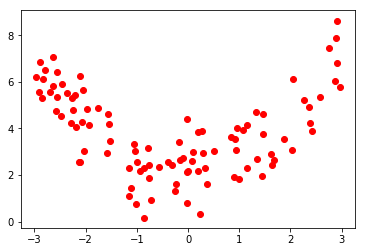

In [23]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X ** 2 + 2  + np.random.randn(100,1)

plt.scatter(X,y,color='red')
plt.show()

### 비교를 위해 단순 선형 회귀를 실행

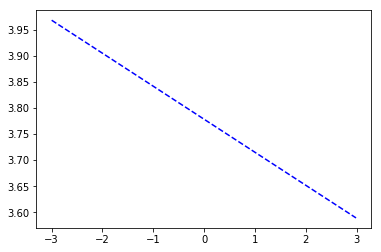

In [24]:
import sklearn.linear_model as lm

X_test = np.arange(-3,3,0.01)[:,np.newaxis]

X1_train = X
y_train = y

reg1 = lm.LinearRegression().fit(X1_train,y_train)

X1_test = X_test
y1_pred = reg1.predict(X1_test)

plt.plot(X_test,y1_pred,color = 'blue',linestyle='--')

### 2차항 형태로 다항 회귀를 실행

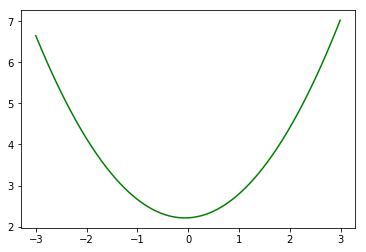

In [25]:
import sklearn.linear_model as lm
import sklearn.preprocessing as pp

X_test = np.arange(-3,3,0.01)[:,np.newaxis]

poly = pp.PolynomialFeatures(degree=2)
X2_train = poly.fit_transform(X)
y_train = y

reg2 = lm.LinearRegression().fit(X2_train,y_train)

X2_test = poly.fit_transform(X_test)
y2_pred = reg2.predict(X2_test)

plt.plot(X_test,y2_pred,color='green')
plt.show()

### 7차항 형태로 다항 회귀를 실행

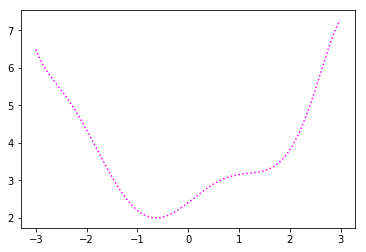

In [26]:
import sklearn.linear_model as lm
import sklearn.preprocessing as pp

X_test = np.arange(-3,3,0.01)[:,np.newaxis]

poly = pp.PolynomialFeatures(degree=7)
X7_train = poly.fit_transform(X)
y_train = y

reg7 = lm.LinearRegression().fit(X7_train,y_train)

X7_test = poly.fit_transform(X_test)
y7_pred = reg7.predict(X7_test)

plt.plot(X_test,y7_pred,color='magenta',linestyle=":")
plt.show()

### 전체적인 결과를 확인

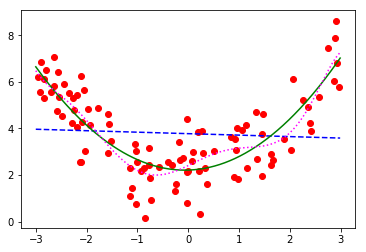

In [28]:
plt.scatter(X,y,color='red')
plt.plot(X_test,y1_pred,color = 'blue',linestyle='--')
plt.plot(X_test,y2_pred,color='green')
plt.plot(X_test,y7_pred,color='magenta',linestyle=":")
plt.show()

## 예제 : 보스턴 데이터

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as d # boston 데이터 가져오기 위해서
import sklearn.model_selection as ms # test,train 나누기 위해서
import sklearn.linear_model as lm
import sklearn.metrics as mt
import sklearn.preprocessing as pp

In [191]:
boston = d.load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [192]:
X = pd.DataFrame(boston_df['RM']) # 2차원을 만들기 위해서
# X = boston.data[:,5]
y = boston_df['PRICE']
# y = boston.target

In [193]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.3,random_state = 1)

In [194]:
lr = lm.LinearRegression()

In [195]:
mses = list()
rmses = list()
r2s = list()

In [196]:
# 단순 선형 회귀 (1차식)
reg = lr.fit(X_train,y_train)
y1_pred = reg.predict(X_test)

mse = mt.mean_squared_error(y_test,y1_pred)
rmse = np.sqrt(mse1)
r2 = mt.r2_score(y_test,y1_pred)

mses.append(mse)
rmses.append(rmse)
r2s.append(r2)

xx = np.linspace(X['RM'].min()-1,X['RM'].max()+1)[:,np.newaxis]
yy1 = reg.predict(xx)

print("{}\nmse : {:3f}\nrmse : {:3f}\nr2 : {:3f}".format('단순 선형회귀',mse,rmse,r2))

단순 선형회귀
mse : 36.517215
rmse : 6.042948
r2 : 0.601577


In [197]:
# 다항 회귀 (2차식)

quad = pp.PolynomialFeatures(degree=2)
X2_train = quad.fit_transform(X_train)
reg = lr.fit(X2_train,y_train)
X2_test = quad.fit_transform(X_test)
y2_pred = reg.predict(X2_test)

mse = mt.mean_squared_error(y_test,y2_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test,y2_pred)

mses.append(mse)
rmses.append(rmse)
r2s.append(r2)

xx2 = quad.fit_transform(xx)
yy2 = reg.predict(xx2)

print("{}\nmse : {:3f}\nrmse : {:3f}\nr2 : {:3f}".format('단순 선형회귀',mse,rmse,r2))

단순 선형회귀
mse : 30.515171
rmse : 5.524054
r2 : 0.667063


In [198]:
# 다항 회귀 (3차식)

cubic = pp.PolynomialFeatures(degree=3)
X3_train = cubic.fit_transform(X_train)
reg = lr.fit(X3_train,y_train)
X3_test = cubic.fit_transform(X_test)
y3_pred = reg.predict(X3_test)

mse = mt.mean_squared_error(y_test,y3_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test,y3_pred)

mses.append(mse)
rmses.append(rmse)
r2s.append(r2)

xx3 = cubic.fit_transform(xx) # 결국 fit_transform은 데이터 불리기구나
yy3 = reg.predict(xx3)

print("{}\nmse : {:3f}\nrmse : {:3f}\nr2 : {:3f}".format('단순 선형회귀',mse,rmse,r2))

단순 선형회귀
mse : 30.541433
rmse : 5.526430
r2 : 0.666776


In [199]:
mses

[36.517214730838624, 30.515171181958426, 30.54143317840435]

In [200]:
rmses

[6.042947520112898, 5.524053872108637, 5.526430419213143]

In [201]:
r2s

[0.6015774471545623, 0.6670629868010144, 0.6667764542233267]

In [202]:
scores = pd.DataFrame({"MSE" : mses,
                       "RMSE" : rmses,
                       "R2" : r2s}, index = ['Linear','Quad','Cubic'])

,MSE,RMSE,R2
Linear,36.517215,6.042948,0.601577
Quad,30.515171,5.524054,0.667063
Cubic,30.541433,5.526430,0.666776


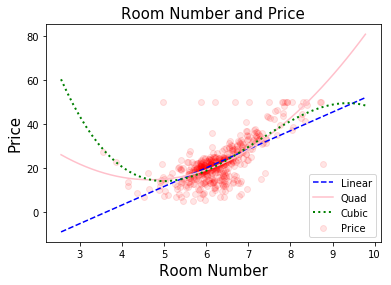

,MSE,RMSE,R2
Linear,36.517215,6.042948,0.601577
Quad,30.515171,5.524054,0.667063
Cubic,30.541433,5.526430,0.666776


In [218]:
plt.scatter(X,y,color='red',alpha=0.1,label = 'Price')
plt.plot(xx,yy1,color='blue',linestyle='--',label='Linear') # 1차식을 그릴거니까
plt.plot(xx,yy2,color='pink',linestyle='-',label='Quad') # 2차식을 그릴거
plt.plot(xx,yy3,color='green',linestyle=':',label='Cubic',linewidth = 2) # 3차식 그릴거
# plt.xlim(2,10)
# plt.ylim(0,60)
plt.title("Room Number and Price",fontsize=15)
plt.xlabel('Room Number',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.legend(fontsize=10)
plt.show()
display(scores)

## 예제 : 당노병 데이터

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as d # 당뇨병 데이터 가져오기 위해서
import sklearn.model_selection as ms # test,train 나누기 위해서
import sklearn.linear_model as lm
import sklearn.metrics as mt
import sklearn.preprocessing as pp

In [232]:
diab = d.load_diabetes()
diab_df = pd.DataFrame(diab.data)
diab_df.columns = diab.feature_names
diab_df['target'] = diab.target
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [233]:
X = pd.DataFrame(diab_df['bmi']) # 2차원을 만들기 위해서
# X = boston.data[:,5]
y = diab_df['target']
# y = boston.target

In [234]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.3,random_state = 1)

In [235]:
lr = lm.LinearRegression()

In [236]:
mses = list()
rmses = list()
r2s = list()

In [237]:
# 단순 선형 회귀 (1차식)
reg = lr.fit(X_train,y_train)
y1_pred = reg.predict(X_test)

mse = mt.mean_squared_error(y_test,y1_pred)
rmse = np.sqrt(mse1)
r2 = mt.r2_score(y_test,y1_pred)

mses.append(mse)
rmses.append(rmse)
r2s.append(r2)

xx = np.linspace(X['bmi'].min()-1,X['bmi'].max()+1)[:,np.newaxis]
yy1 = reg.predict(xx)

print("{}\nmse : {:3f}\nrmse : {:3f}\nr2 : {:3f}".format('단순 선형회귀',mse,rmse,r2))

단순 선형회귀
mse : 4095.914374
rmse : 6.042948
r2 : 0.186426


In [238]:
# 다항 회귀 (2차식)

quad = pp.PolynomialFeatures(degree=2)
X2_train = quad.fit_transform(X_train)
reg = lr.fit(X2_train,y_train)
X2_test = quad.fit_transform(X_test)
y2_pred = reg.predict(X2_test)

mse = mt.mean_squared_error(y_test,y2_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test,y2_pred)

mses.append(mse)
rmses.append(rmse)
r2s.append(r2)

xx2 = quad.fit_transform(xx)
yy2 = reg.predict(xx2)

print("{}\nmse : {:3f}\nrmse : {:3f}\nr2 : {:3f}".format('단순 선형회귀',mse,rmse,r2))

단순 선형회귀
mse : 4130.707078
rmse : 64.270577
r2 : 0.179515


In [239]:
# 다항 회귀 (3차식)

cubic = pp.PolynomialFeatures(degree=3)
X3_train = cubic.fit_transform(X_train)
reg = lr.fit(X3_train,y_train)
X3_test = cubic.fit_transform(X_test)
y3_pred = reg.predict(X3_test)

mse = mt.mean_squared_error(y_test,y3_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test,y3_pred)

mses.append(mse)
rmses.append(rmse)
r2s.append(r2)

xx3 = cubic.fit_transform(xx) # 결국 fit_transform은 데이터 불리기구나
yy3 = reg.predict(xx3)

print("{}\nmse : {:3f}\nrmse : {:3f}\nr2 : {:3f}".format('단순 선형회귀',mse,rmse,r2))

단순 선형회귀
mse : 4193.973165
rmse : 64.760892
r2 : 0.166948


In [240]:
scores = pd.DataFrame({"MSE" : mses,
                       "RMSE" : rmses,
                       "R2" : r2s}, index = ['Linear','Quad','Cubic'])

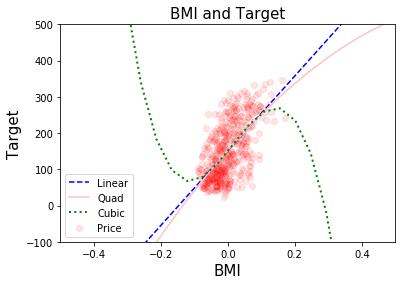

,MSE,RMSE,R2
Linear,4095.914374,6.042948,0.186426
Quad,4130.707078,64.270577,0.179515
Cubic,4193.973165,64.760892,0.166948


In [248]:
plt.scatter(X,y,color='red',alpha=0.1,label = 'Price')
plt.plot(xx,yy1,color='blue',linestyle='--',label='Linear') # 1차식을 그릴거니까
plt.plot(xx,yy2,color='pink',linestyle='-',label='Quad') # 2차식을 그릴거
plt.plot(xx,yy3,color='green',linestyle=':',label='Cubic',linewidth = 2) # 3차식 그릴거
plt.title("BMI and Target",fontsize=15)
plt.xlabel('BMI',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.legend(fontsize=10)
plt.xlim(-0.5,0.5)
plt.ylim(-100,500)
plt.show()
display(scores)